In [ ]:
!pip install onnxruntime

pip install onnxruntime-gpu
conda install -c pytorch torchvision
pip install Pillow
matplotlib
conda activate pm-agent

In [5]:
import onnxruntime as ort

onnx_model_path = "hair_classifier_v1.onnx"
session = ort.InferenceSession(onnx_model_path, providers=[ "CPUExecutionProvider"])  #"CUDAExecutionProvider",
inputs = session.get_inputs()
outputs = session.get_outputs()

input_name = session.get_inputs()[0].name
output_name = session.get_outputs()[0].name

print(f"Input name: {input_name}")
print(f"Output name: {output_name}")


Input name: input
Output name: output


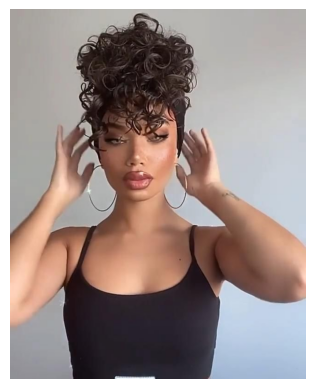

In [8]:
from PIL import Image
import matplotlib.pyplot as plt

img_path = '../data/test/curly/03312ac556a7d003f7570657f80392c34.jpg'
img = Image.open(img_path)
plt.imshow(img)
plt.axis('off')
plt.show()

In [9]:
from io import BytesIO
from urllib import request

from PIL import Image

def download_image(url):
    with request.urlopen(url) as resp:
        buffer = resp.read()
    stream = BytesIO(buffer)
    img = Image.open(stream)
    return img


def prepare_image(img, target_size):
    if img.mode != 'RGB':
        img = img.convert('RGB')
    img = img.resize(target_size, Image.NEAREST)
    return img

In [10]:
import numpy as np
url = "https://habrastorage.org/webt/yf/_d/ok/yf_dokzqy3vcritme8ggnzqlvwa.jpeg"

img = download_image(url)
img = prepare_image(img, (200, 200))
img_array = np.array(img)
img_batch = np.expand_dims(img_array, axis=0)

print(img_batch.shape)


(1, 200, 200, 3)


In [ ]:
import torchvision.transforms as transforms

train_transforms = transforms.Compose([
    transforms.Resize((200, 200)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    ) # ImageNet normalization
])



In [20]:
img_tensor = train_transforms(img)

In [21]:
print(f"Shape del tensor: {img_tensor.shape}")  # torch.Size([3, 200, 200])
print(f"Tipo del tensor: {img_tensor}")  # torch.float32
# Si necesitas un batch, agrega una dimensión
img_batch = img_tensor.unsqueeze(0)
print(f"Shape del batch: {img_batch.shape}")  # torch.Size([1, 3, 200, 200])

Shape del tensor: torch.Size([3, 200, 200])
Tipo del tensor: tensor([[[-1.0733, -1.0048, -1.0390,  ..., -1.0733, -1.0733, -1.2103],
         [-1.0562, -1.0219, -1.0048,  ..., -1.0219, -1.0562, -1.1760],
         [-0.9534, -0.9705, -0.9192,  ..., -1.0219, -1.1075, -1.2274],
         ...,
         [-1.6727, -1.6727, -1.5185,  ...,  1.7352,  1.6495,  1.7865],
         [-1.6727, -1.6555, -1.6384,  ...,  1.6838,  1.5982,  1.7009],
         [-1.6384, -1.7240, -1.6727,  ...,  1.7180,  1.7352,  1.6838]],

        [[-0.2150, -0.1099, -0.1099,  ..., -0.5126, -0.4776, -0.6352],
         [-0.1975, -0.1625, -0.1625,  ..., -0.5126, -0.5476, -0.6001],
         [-0.0749, -0.1275, -0.1450,  ..., -0.4776, -0.6001, -0.7052],
         ...,
         [-1.1429, -1.1429, -0.9678,  ...,  2.0609,  1.9734,  2.1134],
         [-1.1954, -1.1253, -1.0903,  ...,  2.0084,  1.9734,  2.0784],
         [-1.1954, -1.1954, -1.1429,  ...,  2.0434,  2.0784,  2.0609]],

        [[-1.4210, -1.2990, -1.2467,  ..., -1.8044, -1.

In [23]:
# Obtener el nombre de la entrada del modelo
input_name = session.get_inputs()[0].name
print(f"Nombre de entrada: {input_name}")

# Convertir el tensor de PyTorch a numpy
img_numpy = img_batch.numpy()  # o img_batch.detach().numpy() si tiene gradientes

# Ejecutar inferencia
outputs = session.run(None, {input_name: img_numpy})

# Ver resultados
print(f"Output shape: {outputs[0].shape}")
print(f"Predicción: {outputs}")

Nombre de entrada: input
Output shape: (1, 1)
Predicción: [array([[0.09156641]], dtype=float32)]


In [25]:
classes = [
    "curly",
    "straight"
]

float_predictions = outputs[0][0].tolist()

dict(zip(classes, float_predictions))

{'curly': 0.09156641364097595}

In [ ]:
/datatalks-club/homework/DataTalksClub# docker pull agrigorev/model-2024-hairstyle:v3
 docker pull agrigorev/model-2025-hairstyle:v1
docker images


IMAGE                                 ID             DISK USAGE   CONTENT SIZE   EXTRA
agrigorev/model-2024-hairstyle:v3     607850a2138e        782MB             0B        
agrigorev/model-2025-hairstyle:v1     4528ad1525d5        608MB             0B

In [ ]:
#FROM public.ecr.aws/lambda/python:3.13

 docker build -t hair-style:v2 .


 docker run -it --rm -p 8080:8080 hair-style:v2

In [26]:
import requests

url = 'http://localhost:8080/2015-03-31/functions/function/invocations'

request = {
    "url": "https://habrastorage.org/webt/yf/_d/ok/yf_dokzqy3vcritme8ggnzqlvwa.jpeg"
}

result = requests.post(url, json=request).json()
print(result)

{'curly': -0.10220836102962494}


In [ ]:
04 Dec 2025 22:21:17,151 [INFO] (rapid) INIT RTDONE(status: success)
04 Dec 2025 22:21:17,151 [INFO] (rapid) INIT REPORT(durationMs: 3074.293000)
04 Dec 2025 22:21:17,151 [INFO] (rapid) INVOKE START(requestId: 0ce41d83-bfe3-4a79-9651-71a3802d1c05)
Shape del tensor: torch.Size([3, 200, 200])
Shape del batch: torch.Size([1, 3, 200, 200])
Nombre de entrada: input
04 Dec 2025 22:21:19,080 [INFO] (rapid) INVOKE RTDONE(status: success, produced bytes: 0, duration: 1928.503000ms)
END RequestId: 0ce41d83-bfe3-4a79-9651-71a3802d1c05
REPORT RequestId: 0ce41d83-bfe3-4a79-9651-71a3802d1c05  Init Duration: 1.49 ms  Duration: 5003.09 ms    Billed Duration: 5004 ms        Memory Size: 3008 MB    Max Memory Used: 3008 MB

In [28]:
import requests

url = 'http://localhost:8080/2015-03-31/functions/function/invocations'

request = {
    "url": "https://habrastorage.org/webt/yf/_d/ok/yf_dokzqy3vcritme8ggnzqlvwa.jpeg"
}

result = requests.post(url, json=request).json()
print(result)

{'errorMessage': '[ONNXRuntimeError] : 2 : INVALID_ARGUMENT : Unexpected input data type. Actual: (tensor(double)) , expected: (tensor(float))', 'errorType': 'InvalidArgument', 'requestId': '8900e289-2923-41b1-b4ff-c3853afbfd5d', 'stackTrace': ['  File "/var/task/lambda_function.py", line 54, in lambda_handler\n    result = predict(url)\n', '  File "/var/task/lambda_function.py", line 47, in predict\n    outputs = session.run(None, {input_name: img_batch})\n', '  File "/var/lang/lib/python3.13/site-packages/onnxruntime/capi/onnxruntime_inference_collection.py", line 287, in run\n    return self._sess.run(output_names, input_feed, run_options)\n']}
